## 3.1.4 Challenge: Model Comparison

You now know two kinds of regression and two kinds of classifier. So let's use that to compare models!

Comparing models is something data scientists do all the time. There's very rarely just one model that would be possible to run for a given situation, so learning to choose the best one is very important.

Here let's work on regression. Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?

Create a Jupyter notebook with your models. At the end in a markdown cell write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model. Submit a link to your notebook below.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from scipy import stats

I'm using a dataset of open, high, low and close bid prices for the FTSE100 market, corresponding to the 15 minute time frame, from October 2017 through April 2018.

In [2]:
data_path = '/home/mache/Desktop/Thinkful/Course/Unit 3/GBRIDXGBP_15 Mins_Bid_2017.10.01_2018.04.01.csv'
df = pd.read_csv(data_path)[['Time (ART)','Open', 'High', 'Low', 'Close']]
display(df.shape)
display(df.head(3))

(12480, 5)

,Time (ART),Open,High,Low,Close
0,2017.10.01 18:00:00,7374.969,7374.969,7374.969,7374.969
1,2017.10.01 18:15:00,7374.969,7374.969,7374.969,7374.969
2,2017.10.01 18:30:00,7374.969,7374.969,7374.969,7374.969


In [3]:
df.describe()

,Open,High,Low,Close
count,12480.000000,12480.000000,12480.000000,12480.000000
mean,7417.746102,7420.042335,7415.386699,7417.709764
std,209.611137,208.999603,210.277273,209.629732
min,6858.100000,6865.600000,6851.609000,6858.349000
25%,7249.550000,7251.400000,7244.764000,7249.512250
50%,7458.770000,7459.800000,7456.770000,7458.770000
75%,7549.269000,7552.270000,7548.269250,7549.269000
max,7788.969000,7792.770000,7786.269000,7788.770000


### Adding the Commodity Channel Index (CCI) to our dataset

CCI is a versatile momentum oscillator that can be used to identify overbought/oversold levels or trend reversals. The indicator becomes overbought or oversold when it reaches a relative extreme.

In [4]:
# Commodity Channel Index 
def CCI(df, ndays): 
 TP = (df['High'] + df['Low'] + df['Close']) / 3 
 CCI = pd.Series((TP - pd.rolling_mean(TP, ndays)) / (0.015 * pd.rolling_std(TP, ndays)),
 name = 'CCI') 
 df = df.join(CCI) 
 return df

In [5]:
# Compute the Commodity Channel Index(CCI) for FTSE100 based on the 20-day Moving average
n = 20
FTSE_CCI = CCI(df, n)
CCI = FTSE_CCI['CCI']

/home/mache/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  after removing the cwd from sys.path.
/home/mache/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).std()
  after removing the cwd from sys.path.


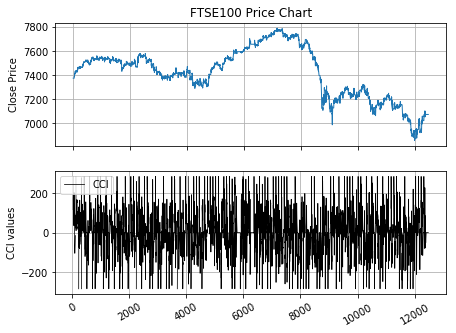

In [6]:
# Plotting the Price Series chart and the Commodity Channel index below
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(2, 1, 1)
ax.set_xticklabels([])
plt.plot(df['Close'],lw=1)
plt.title('FTSE100 Price Chart')
plt.ylabel('Close Price')
plt.grid(True)
bx = fig.add_subplot(2, 1, 2)
plt.plot(CCI,'k',lw=0.75,linestyle='-',label='CCI')
plt.legend(loc=2,prop={'size':10})
plt.ylabel('CCI values')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
plt.show()

In [7]:
df = pd.concat([df, CCI], axis=1)

In [8]:
df2 = df.replace([np.inf, -np.inf], np.nan)

In [9]:
df2 = df2.replace([np.inf, -np.inf], np.nan).dropna(subset=["CCI"], how="all")

In [10]:
df2.head(5)

,Time (ART),Open,High,Low,Close,CCI
36,2017.10.02 03:00:00,7383.969,7385.47,7380.769,7383.969,283.235277
37,2017.10.02 03:15:00,7384.269,7386.27,7382.269,7384.469,205.978172
38,2017.10.02 03:30:00,7384.269,7386.77,7382.770,7382.770,157.661018
39,2017.10.02 03:45:00,7382.969,7384.47,7379.770,7384.269,114.071201
40,2017.10.02 04:00:00,7383.970,7391.77,7373.969,7390.969,136.717910


In [11]:
df2.describe()

,Open,High,Low,Close,CCI
count,12318.000000,12318.000000,12318.000000,12318.000000,12318.000000
mean,7417.580891,7419.907322,7415.190458,7417.544075,2.019403
std,210.942122,210.328114,211.610718,210.960813,81.860573
min,6858.100000,6865.600000,6851.609000,6858.349000,-283.235277
25%,7245.276500,7250.704750,7241.040000,7245.021500,-42.918377
50%,7458.770000,7461.270000,7458.119000,7458.770000,0.000007
75%,7551.470000,7552.969000,7549.269000,7551.419250,47.231402
max,7788.969000,7792.770000,7786.269000,7788.770000,283.235280


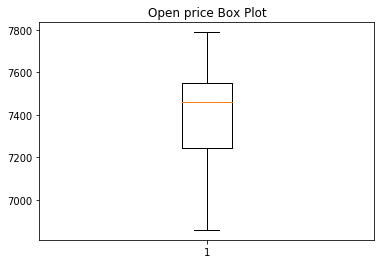

In [12]:
#Plot outcome variable
plt.boxplot(df2['Open'])
plt.title("Open price Box Plot")
plt.show()

In [13]:
#Define X and Y
X = df2[['High', 'Low', 'Close','CCI']]
Y = df2['Open']

## OLS Regression¶

In [14]:
# Write out the model formula.
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form

linear_formula = "Open ~ High + Low + Close + CCI"

# Fit the model to our data using the formula.
ftse_model = smf.ols(formula=linear_formula, data=df2).fit()

R-squared Accuracy: 0.9992 (+/- 0.0012)

Parameters

 Intercept   -1.589643
High         0.822022
Low          0.747771
Close       -0.569597
CCI         -0.005269
dtype: float64

P-values

 Intercept    2.648419e-02
High         0.000000e+00
Low          0.000000e+00
Close        0.000000e+00
CCI          1.073122e-99
dtype: float64

Confidence Intervals


,0,1
Intercept,-2.993664,-0.185622
High,0.811699,0.832345
Low,0.737775,0.757766
Close,-0.585133,-0.554061
CCI,-0.005751,-0.004786


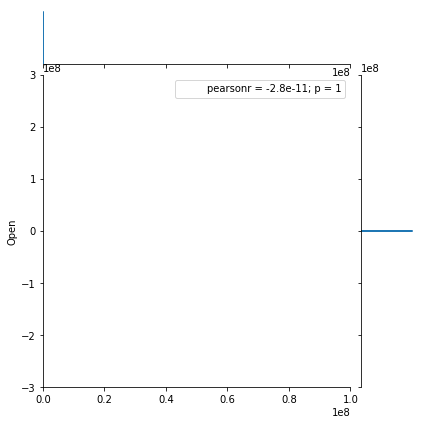

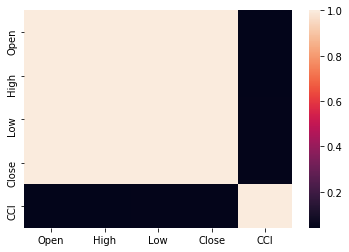

In [15]:
#5 fold cross validation for r-squared
sk_ftse_model = linear_model.LinearRegression()
score = cross_val_score(sk_ftse_model, X, Y, cv=5)
print("R-squared Accuracy: %0.4f (+/- %0.4f)" % (score.mean(), score.std() * 2))

#Check parameters
print ("\nParameters\n\n", ftse_model.params)

#Verify low p-values and confidence intervals to keep features
print ("\nP-values\n\n", ftse_model.pvalues)
print ("\nConfidence Intervals")
display(ftse_model.conf_int())

#Residuals
ols_ypred = ftse_model.predict()
ols_residual = ols_ypred - Y

sns.jointplot(ols_ypred, ols_residual, kind = 'kde', xlim = [0,100000000], ylim = [-300000000,300000000])
plt.show()

sns.heatmap(df2.corr())
plt.show()

## KNN Regression¶

Nearest neighbors: 5
R-squared Accuracy: 0.9364 (+/- 0.1725)
Nearest neighbors: 15
R-squared Accuracy: 0.9089 (+/- 0.2595)
Nearest neighbors: 25
R-squared Accuracy: 0.8960 (+/- 0.2958)
Nearest neighbors: 35
R-squared Accuracy: 0.8867 (+/- 0.3162)
Nearest neighbors: 45
R-squared Accuracy: 0.8774 (+/- 0.3345)
Nearest neighbors: 55
R-squared Accuracy: 0.8677 (+/- 0.3563)
Nearest neighbors: 65
R-squared Accuracy: 0.8588 (+/- 0.3756)


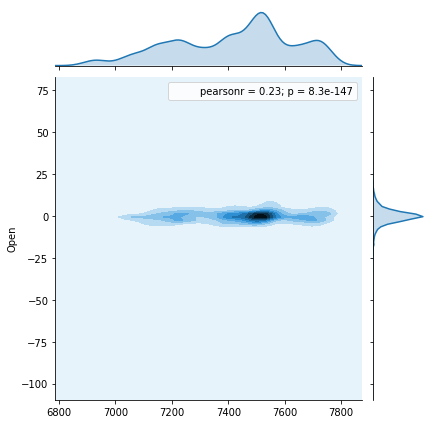

In [16]:
# Our input data frame will be the z-scores this time instead of raw data.
X_norm = X.apply(stats.zscore)
for k in range(5,75,10):
    knn = neighbors.KNeighborsRegressor(n_neighbors=k, weights='uniform')
    knn.fit(X_norm,Y)
    knn_ypred = knn.predict(X_norm)
    score = cross_val_score(knn, X_norm, Y, cv=5)
    print ("Nearest neighbors: {}".format(k))
    print("R-squared Accuracy: %0.4f (+/- %0.4f)" % (score.mean(), score.std() * 2))
# best k is 25
knn = neighbors.KNeighborsRegressor(n_neighbors=k, weights='uniform')
knn.fit(X_norm,Y)
knn_ypred = knn.predict(X_norm)
knn_residual = Y - knn_ypred
sns.jointplot(knn_ypred, knn_residual, kind = "kde")
plt.show()